In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

In [19]:
iris = load_iris()
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame = iris_frame.drop("name", axis="columns")
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
iris_frame = iris_frame.drop("sepal width (cm)", axis="columns")
y = iris_frame.target
X = iris_frame.drop("target", axis="columns")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LogisticRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9555555555555556

Text(95.72222222222221, 0.5, 'Truth')

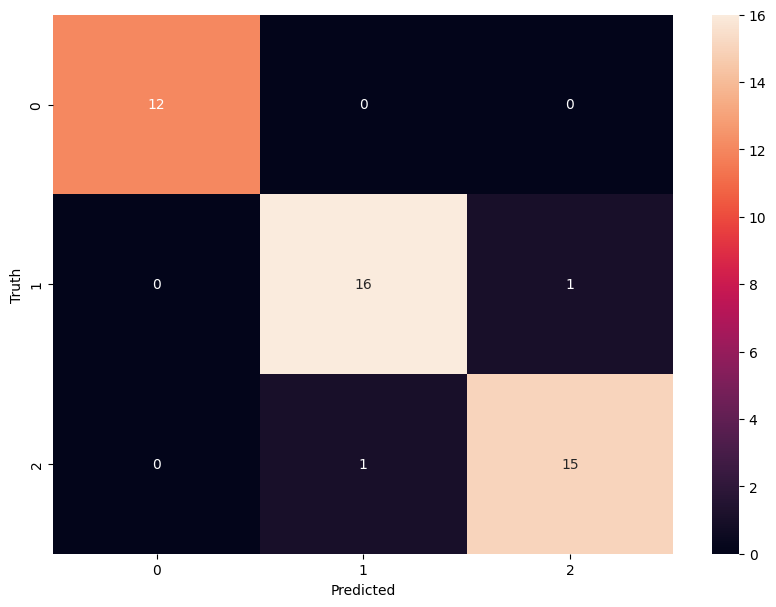

In [21]:
cm = confusion_matrix(y_test, reg.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')